<a href="https://colab.research.google.com/github/seunghee0518/R_File/blob/main/R_%EB%8B%A4%EB%B3%80%EB%9F%89%EB%B6%84%EC%84%9D_3%EC%9E%A5_%EC%9D%B8%EC%9E%90%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분분석을 이용한 인자분석

In [2]:
#무료 검진프로그램 PHI 의 유효성 자료
med_url = 'https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8B%A4%EB%B3%80%EB%9E%91%EB%B6%84%EC%84%9D/mvadata/medFactor.txt'
med = read.table(med_url, header=T)

In [3]:
head(med, 3)

,lung,muscle,liver,skeleton,kidneys,heart,step,stamina,stretch,blow,urine
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,20,16,52,10,24,23,19,20,23,29,67
2,24,16,52,7,27,16,16,15,31,33,59
3,19,21,57,18,22,23,16,19,42,40,61


In [4]:
#요약통계량
summary(med)

      lung           muscle          liver          skeleton    
 Min.   : 4.00   Min.   : 9.00   Min.   :26.00   Min.   : 3.00  
 1st Qu.:17.00   1st Qu.:16.00   1st Qu.:50.75   1st Qu.:11.00  
 Median :20.00   Median :19.00   Median :55.00   Median :13.00  
 Mean   :19.96   Mean   :18.82   Mean   :54.70   Mean   :12.87  
 3rd Qu.:23.00   3rd Qu.:22.00   3rd Qu.:60.25   3rd Qu.:15.00  
 Max.   :29.00   Max.   :28.00   Max.   :69.00   Max.   :19.00  
    kidneys          heart            step          stamina     
 Min.   :16.00   Min.   :11.00   Min.   : 4.00   Min.   : 7.00  
 1st Qu.:23.00   1st Qu.:22.00   1st Qu.:15.00   1st Qu.:14.00  
 Median :26.00   Median :23.00   Median :17.00   Median :16.00  
 Mean   :25.64   Mean   :23.18   Mean   :16.17   Mean   :15.87  
 3rd Qu.:29.00   3rd Qu.:25.00   3rd Qu.:18.00   3rd Qu.:18.00  
 Max.   :32.00   Max.   :56.00   Max.   :20.00   Max.   :20.00  
    stretch           blow           urine      
 Min.   :16.00   Min.   :17.00   Min.   :

In [5]:
#초기 인자분석
install.packages('psych')
library(psych)
install.packages('GPArotation')
library(GPArotation)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
#주성분인자법을 이용한 인자분석
med.factor = principal(med, rotate = 'none')
names(med.factor)

[1] "values"       "rotation"     "n.obs"        "communality"  "loadings"    
 [6] "fit"          "fit.off"      "fn"           "Call"         "uniquenesses"
[11] "complexity"   "chi"          "EPVAL"        "R2"           "objective"   
[16] "residual"     "rms"          "factors"      "dof"          "null.dof"    
[21] "null.model"   "criteria"     "STATISTIC"    "PVAL"         "weights"     
[26] "r.scores"     "Vaccounted"   "Structure"    "scores"

In [7]:
#고유근
med.factor$values

[1] 3.3791814 1.4827707 1.2506302 0.9804771 0.7688022 0.7330511 0.6403994
 [8] 0.6221934 0.5283718 0.3519301 0.2621928

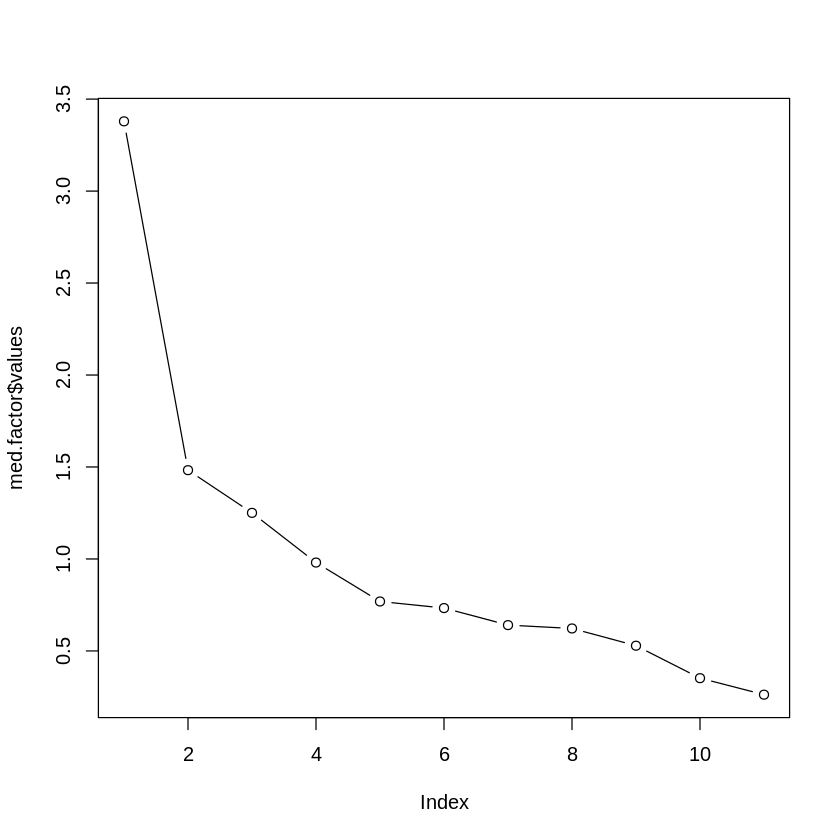

In [8]:
plot(med.factor$values, type = 'b')

* 세번째 인자까지 고유근이 1 이상임
* 4번째 인자부터 기울기 완만
* 유효한 인자 수 : 3~4개

In [9]:
#인자회전 : 직교회전 - Varimax
med.Varimax = principal(med, nfactors = 3, rotate = 'varimaxx')
med.Varimax

Specified rotation not found, rotate='none' used



Principal Components Analysis
Call: principal(r = med, nfactors = 3, rotate = "varimaxx")
Standardized loadings (pattern matrix) based upon correlation matrix
          PC1   PC2   PC3   h2   u2 com
lung     0.60 -0.25 -0.22 0.47 0.53 1.6
muscle   0.32 -0.47  0.56 0.64 0.36 2.6
liver    0.70 -0.30 -0.28 0.66 0.34 1.7
skeleton 0.58 -0.20  0.56 0.70 0.30 2.2
kidneys  0.61 -0.06 -0.48 0.61 0.39 1.9
heart    0.47 -0.44 -0.23 0.46 0.54 2.5
step     0.67  0.13 -0.11 0.48 0.52 1.1
stamina  0.48  0.35  0.33 0.47 0.53 2.7
stretch  0.64  0.29  0.29 0.57 0.43 1.8
blow     0.59  0.46 -0.06 0.56 0.44 1.9
urine    0.23  0.67 -0.07 0.50 0.50 1.3

                       PC1  PC2  PC3
SS loadings           3.38 1.48 1.25
Proportion Var        0.31 0.13 0.11
Cumulative Var        0.31 0.44 0.56
Proportion Explained  0.55 0.24 0.20
Cumulative Proportion 0.55 0.80 1.00

Mean item complexity =  1.9
Test of the hypothesis that 3 components are sufficient.

The root mean square of the residuals (RMSR) is  0.

* 결과값의 h2 : 각 변수의 공통성
* u2 : 고유분산, u2 = 1-h2
* 각 변수들의 유의한 인자 : RC1, RC2, RC3 -> h2가 공통성 나타냄

> 인자부하값(h2?)
* lung : 0.47 = 0.66^2 + 0.12^2 + 0.16^2
* muscle : 0.64 = 0.11^2 + (-0.09)^2 + 0.79^2
* liver : 0.66 = 0.78^2 + 0.13^2 + 0.17^2

* 공통성 -> 많은 문항(변수) 중 에서 서로 연관이 있는 일부 문항들을 선택하기 위해 인자분석을 실시하는 경우 문항선택의 기준으로 이용됨

> 'SS loadings' : 각 인자에 의해 설명되는 분산의 양 => 인자부하값의 제곱의 합
* RC1 : 2.39 = 0.66^2 + 0.11^2 + 0.78^2 + ... + (-0.07)^2
* RC2 : 2.13 = 0.12^2 + (-0.09)^2 + 0.13^2 + ... + 0.65^2
* RC3 : 1.59 = 0.16^2 + 0.79^2

> 'Proportion Var' : 각 인자가 설명하는 총분산의 비율
* RC1 -> 22%
* RC2 -> 19%
* RC3 -> 14% 를 설명함
* 세 인자로 설명되는 변동 : 56%
* 반올림으로 수식의 값이 정확하게 일치하지 않을 수도 있음

> 회전된 요인에 대한 변수들의  요인 적재값
* 첫번째 인자 : lung, liver, kidneys, heart가 높은 값을 가짐, step은 상대적으로 높은 적재값 => 생물의학
* 두번째 인자 : stamina, stretch, blow, urine이 높음 => 인체기능
* 세번째 인자 : muscle, skeletion에서 높은 값을 가짐 => 근육골계통력

> 인자모형
* lung = 0.66 factor1 + 0.2 factor2 + 0.16factor3 + e1
* muscle = 0.11factor1 - 0.09factor2 + 0.79factor3 + e2
* 이와 같이 각 변수를 인자와 오차를 이용해 인자모형을 나타낼 수 있음

In [10]:
#회귀분석을 이용한 인자점수 추정
head(med.Varimax$scores, 3)

PC1,PC2,PC3
-0.5135900,0.1853826,-0.5806152
-0.8086043,0.2967191,-1.3554660
0.6684054,0.2557389,1.7230275


In [11]:
#인자회전 : 사각회전 - Oblimin 
#principal(scores = TRUE, method = 'regression' or 'Bartlett')함수로 인자점수 계산
med.oblimin = principal(med, nfactors = 3, rotate = 'oblimin', scores = T, method = 'regression')
med.oblimin

Principal Components Analysis
Call: principal(r = med, nfactors = 3, rotate = "oblimin", scores = T, 
    method = "regression")
Standardized loadings (pattern matrix) based upon correlation matrix
           TC1   TC2   TC3   h2   u2 com
lung      0.66  0.01  0.10 0.47 0.53 1.0
muscle    0.02 -0.16  0.79 0.64 0.36 1.1
liver     0.79 -0.01  0.09 0.66 0.34 1.0
skeleton  0.06  0.21  0.77 0.70 0.30 1.2
kidneys   0.76  0.12 -0.21 0.61 0.39 1.2
heart     0.66 -0.23  0.12 0.46 0.54 1.3
step      0.45  0.40  0.06 0.48 0.52 2.0
stamina  -0.08  0.61  0.30 0.47 0.53 1.5
stretch   0.08  0.61  0.34 0.57 0.43 1.6
blow      0.21  0.67 -0.06 0.56 0.44 1.2
urine    -0.09  0.69 -0.27 0.50 0.50 1.3

                       TC1  TC2  TC3
SS loadings           2.43 2.04 1.64
Proportion Var        0.22 0.19 0.15
Cumulative Var        0.22 0.41 0.56
Proportion Explained  0.40 0.33 0.27
Cumulative Proportion 0.40 0.73 1.00

 With component correlations of 
     TC1  TC2  TC3
TC1 1.00 0.25 0.24
TC2 0.25 1.00 0

* 위와 비교할 때 세 인자에 대해 묶여지는 변수는 같으나 인자 적재값이 차이가 난다

> 인자모형
* lung = 0.66 factor1 + 0.01 factor2 + 0.10 factor3 + e1
* muscle = 0.02 factor1 - 0.16 factor2 + 0.79 factor3 + e2
* ...

> 인자점수 함수식
* factor1 = 0.66 lung + 0.02 muscle + ... - 0.09 urine
* factor2 = 0.01 lung - 0.16 muscle + ... + 0.69 urine
* factor3 = 0.10 lung + 0.79 muscle + ... - 0.27 urine

In [12]:
#인자점수
head(med.oblimin$scores, 3)

TC1,TC2,TC3
-0.2325231,-0.2639103,-0.7735111
-0.1722964,-0.4641659,-1.5453948
-0.2852637,0.8308965,1.5025146


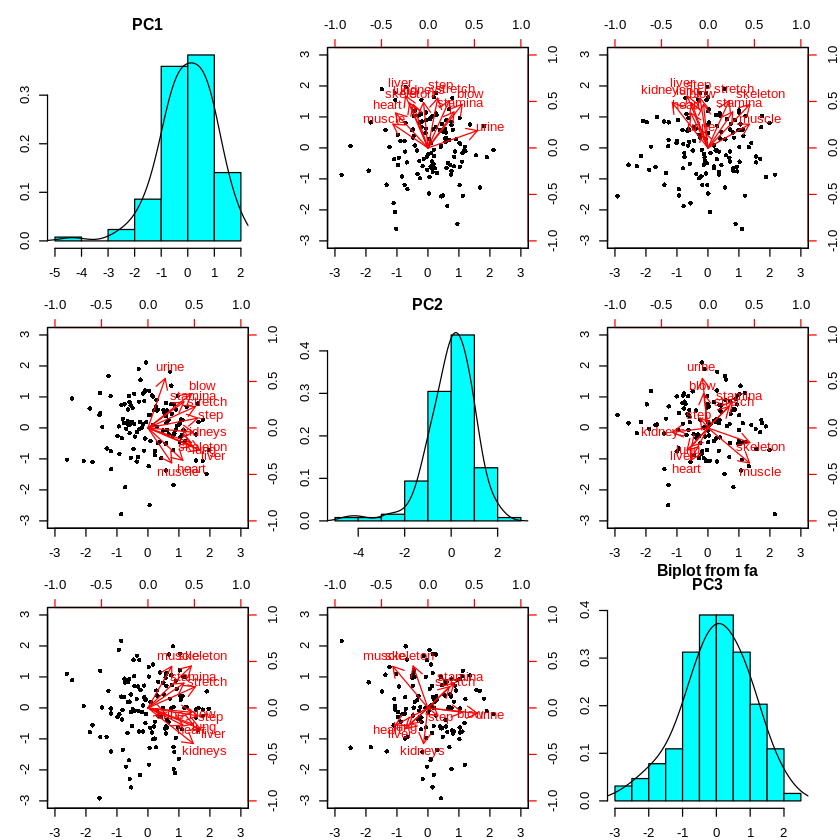

In [13]:
#행렬도 : varimax로 구한 행렬도
biplot(med.Varimax)

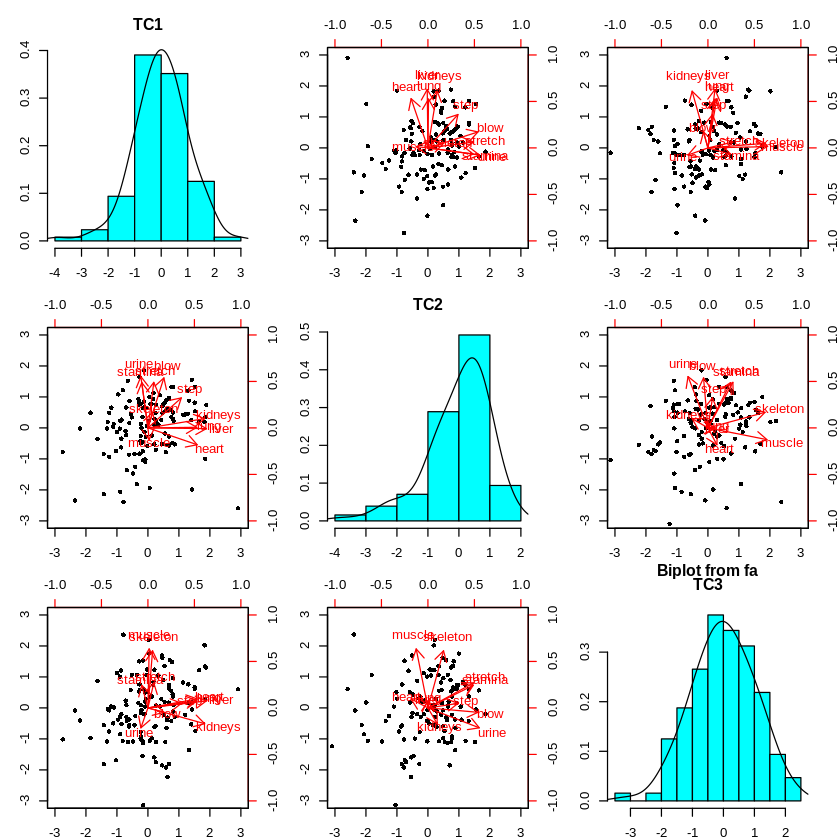

In [14]:
#행렬도 : oblimin
biplot(med.oblimin) 

# 최우추정법 이용 인자분석


In [15]:
#데이터 가져오기
state.x77

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
California,21198,5114,1.1,71.71,10.3,62.6,20,156361
Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766
Connecticut,3100,5348,1.1,72.48,3.1,56.0,139,4862
Delaware,579,4809,0.9,70.06,6.2,54.6,103,1982
Florida,8277,4815,1.3,70.66,10.7,52.6,11,54090
Georgia,4931,4091,2.0,68.54,13.9,40.6,60,58073


In [16]:
#요약
state = state.x77
summary(state)

   Population        Income       Illiteracy       Life Exp    
 Min.   :  365   Min.   :3098   Min.   :0.500   Min.   :67.96  
 1st Qu.: 1080   1st Qu.:3993   1st Qu.:0.625   1st Qu.:70.12  
 Median : 2838   Median :4519   Median :0.950   Median :70.67  
 Mean   : 4246   Mean   :4436   Mean   :1.170   Mean   :70.88  
 3rd Qu.: 4968   3rd Qu.:4814   3rd Qu.:1.575   3rd Qu.:71.89  
 Max.   :21198   Max.   :6315   Max.   :2.800   Max.   :73.60  
     Murder          HS Grad          Frost             Area       
 Min.   : 1.400   Min.   :37.80   Min.   :  0.00   Min.   :  1049  
 1st Qu.: 4.350   1st Qu.:48.05   1st Qu.: 66.25   1st Qu.: 36985  
 Median : 6.850   Median :53.25   Median :114.50   Median : 54277  
 Mean   : 7.378   Mean   :53.11   Mean   :104.46   Mean   : 70736  
 3rd Qu.:10.675   3rd Qu.:59.15   3rd Qu.:139.75   3rd Qu.: 81162  
 Max.   :15.100   Max.   :67.30   Max.   :188.00   Max.   :566432  

In [17]:
#인자분석 실행
library(stats)

In [18]:
#회전안함
state.fact = factanal(state, factors = 3, rotation = 'none')

#varimax 회전 = default
state.fact1 = factanal(state, factors = 3, rotation = 'varimax')
#promax 회전
state.fact2 = factanal(state, factors = 3, rotation = 'promax')


In [19]:
names(state.fact)

[1] "converged"    "loadings"     "uniquenesses" "correlation"  "criteria"    
 [6] "factors"      "dof"          "method"       "STATISTIC"    "PVAL"        
[11] "n.obs"        "call"

In [20]:
#인자분석 결과 : factanal()함수로 나온 인자부하값을 이용해 고유근 구함
#인자 수 4로해 고유근만 산출
state.fact0 = factanal(state, factors = 4)

#sum of squares
sosq = function(v) { sum(v^2) }

#고유근 구하기
loadings = as.matrix(state.fact0$loadings)
evalues = apply(loadings, 2, sosq)
evalues

Factor1  Factor2  Factor3  Factor4 
2.053821 1.679753 1.321085 0.820967

* 고유근이 1이상이 3개의 인자이므로 3개의 인자만 유효함

In [21]:
# Varimax 회전 결과(Population 제외 전)
state.fact1


Call:
factanal(x = state, factors = 3, rotation = "varimax")

Uniquenesses:
Population     Income Illiteracy   Life Exp     Murder    HS Grad      Frost 
     0.813      0.474      0.266      0.240      0.050      0.167      0.005 
      Area 
     0.613 

Loadings:
           Factor1 Factor2 Factor3
Population -0.156   0.361   0.181 
Income      0.316           0.651 
Illiteracy -0.576   0.543  -0.328 
Life Exp    0.856  -0.128   0.103 
Murder     -0.854   0.459   0.103 
HS Grad     0.576  -0.149   0.692 
Frost       0.137  -0.966   0.209 
Area       -0.184           0.593 

               Factor1 Factor2 Factor3
SS loadings      2.301   1.612   1.459
Proportion Var   0.288   0.201   0.182
Cumulative Var   0.288   0.489   0.671

Test of the hypothesis that 3 factors are sufficient.
The chi square statistic is 20.47 on 7 degrees of freedom.
The p-value is 0.00464 

* 'Uniquenesses' : 고유분산
* '1-고유분산' = 공통성 -> 각 변수의 공통성 계산 가능
* 'Population'의 공통성 = 0.187 -> 매우 작음므로 제외하는 것이 타당함

In [23]:
# varimax 회전 결과(population 제외)
state.fact1.populX = factanal(state[, -1], factors = 3, rotation = 'varimax', scores = 'Bartlett')
state.fact1.populX



Call:
factanal(x = state[, -1], factors = 3, scores = "Bartlett", rotation = "varimax")

Uniquenesses:
    Income Illiteracy   Life Exp     Murder    HS Grad      Frost       Area 
     0.533      0.263      0.221      0.094      0.101      0.005      0.579 

Loadings:
           Factor1 Factor2 Factor3
Income      0.264   0.621   0.105 
Illiteracy -0.599  -0.301  -0.537 
Life Exp    0.867   0.141         
Murder     -0.866          -0.391 
HS Grad     0.534   0.763   0.179 
Frost       0.192   0.119   0.972 
Area       -0.252   0.597         

               Factor1 Factor2 Factor3
SS loadings      2.316   1.452   1.436
Proportion Var   0.331   0.207   0.205
Cumulative Var   0.331   0.538   0.743

Test of the hypothesis that 3 factors are sufficient.
The chi square statistic is 7.29 on 3 degrees of freedom.
The p-value is 0.0631 

* 인자가 3개일 경우 p값 : 0.0631 -> 귀무가설 받아들임
* 첫번째 인자 : 33.1%, 두번째 인자 : 20.7%, 세번째 인자 : 20.5의 설명력을 가짐

> 첫번째 인자
* 문맹, 살인, 생활수준기대, 고등교육 수준의 비중이 큼
* 문맹&살인 / 생활수준기대 & 고등교육수준 반대 부호임
* 즉. 고등교육수준과 생활수준에 대한 기대가 낮을 수록 문맹률과 살인유율이 높아진다.
* => 삶의 질 인자

> 두번째 인자
* 수입, 고등교육수준, 지역이 높은 값을 가짐
* => 사회적 지위 인자

> 세번째 인자
* 기후, 문맹이 높은 값을 가짐
* 기후 인자

> 인자모형
* income = 0.264 factor1 + 0.621 factor2 + 0.105 factor3 + e1
* illiteracy = -0.599 factor1 - 0.301 factor2  - 0.537 factor3 + e2
* ...

> 인자점수
factor1 = 0.264 income - 0.599 illiteracy + ... - 0.252 area
factor2 = 0.621 income - 0.301 illiteracy + ... + 0.597 area
factor3 = 0.105 income - 0.537 illiteracy + ... + 0.04 area




In [24]:
#인자점수
state.fact1.populX$scores

,Factor1,Factor2,Factor3
Alabama,-1.65096019,-0.49376734,-1.28710622
Alaska,-2.00028383,3.88798794,0.86086473
Arizona,0.44463744,0.75445578,-1.94918945
Arkansas,-0.56577894,-1.56660667,-0.48274061
California,0.28211067,1.93461012,-1.96336941
Colorado,0.07832695,1.38347239,1.02731166
Connecticut,1.08568725,-0.28965227,0.49853736
Delaware,0.20275514,0.02529933,-0.06500747
Florida,-0.02108532,0.52126839,-1.90575059
Georgia,-1.84211920,-0.58494442,-0.44482855


ERROR: ignored

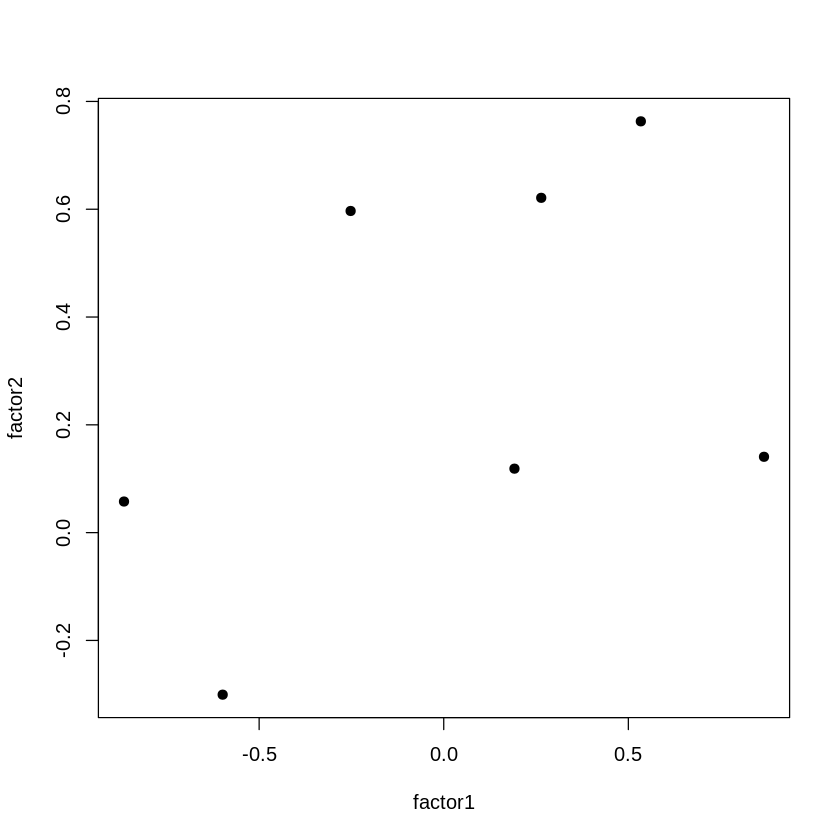

In [30]:
#인자패턴
#plot(factor1, factor2)
fact1 = state.fact1.populX
namevar = colnames(state)

plot(fact1$loadings[, 1], fact1$loadings[, 2], xlab = 'factor1', ylab = 'factor2', pch = 19)
text(x = fact1$loadinds[, 1], y = fact1$loadings[, 2], labels = namevar, adj = -0.1, cex = 0.8)
abline(h=0, v=0, lty =2)

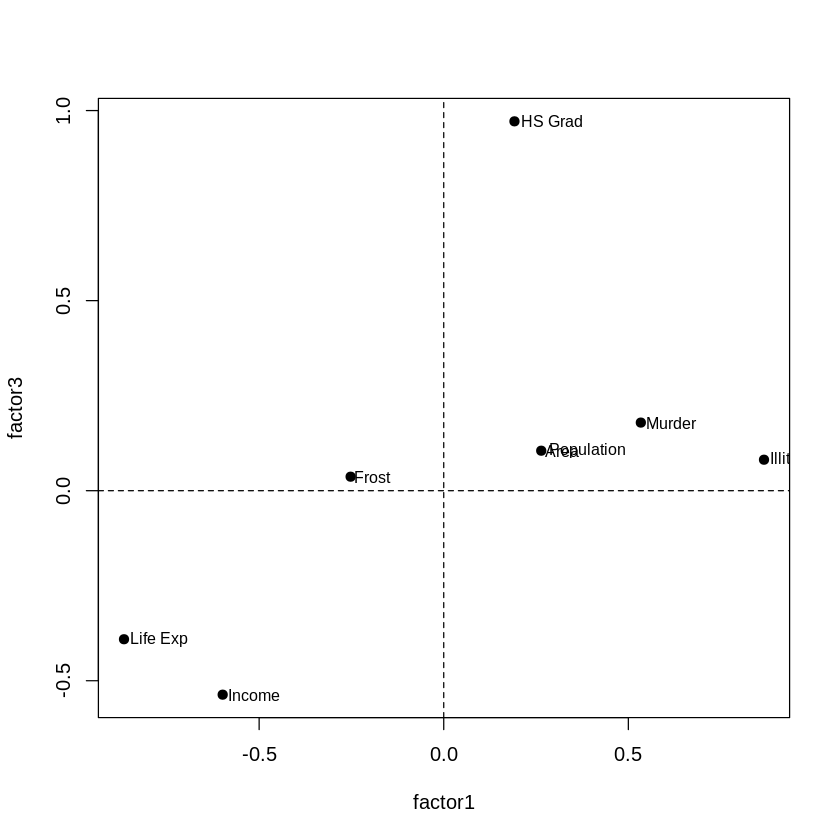

In [27]:
#plot(factor1, factor3)
plot(fact1$loadings[, 1], fact1$loadings[, 3], xlab = 'factor1', ylab= 'factor3', pch = 19)
text(x = fact1$loadings[, 1], y= fact1$loadings[, 3], labels = namevar, adj = -0.1, cex = 0.8)
abline(h= 0, v = 0, lty = 2)

# psych 패키지 fa()로 인자분석


> 73명 여학생에 대한 6개 항목의 심리 테스트
* visperc(Visual perception scores) : 시지각력
* cubes(Test of spatial visualization) : 공간시각화력
* lozenges(Test of spatial orientation) : 공간적 방향 인지력
* paragraph(Paragraph comprehension score) : 문단 이해력
* sentence(Sentence completion score) : 문장 완성력
* wordmean(Word meaning score) : 단어 이해력

In [32]:
#데이터 가져오기
grntFem_url = 'https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8B%A4%EB%B3%80%EB%9E%91%EB%B6%84%EC%84%9D/mvadata/grntFem.csv'
fem = read.csv(grntFem_url, header = T)
head(fem, 3)

,visperc,cubes,lozenges,paragrap,sentence,wordmean
,<int>,<int>,<int>,<int>,<int>,<int>
1,33,22,17,8,17,10
2,30,25,20,10,23,18
3,36,33,36,17,25,41


In [33]:
summary(fem)

    visperc          cubes         lozenges        paragrap        sentence   
 Min.   :11.00   Min.   : 9.0   Min.   : 3.00   Min.   : 2.00   Min.   : 4.0  
 1st Qu.:26.00   1st Qu.:22.0   1st Qu.: 9.00   1st Qu.: 8.00   1st Qu.:17.0  
 Median :30.00   Median :25.0   Median :13.00   Median :10.00   Median :20.0  
 Mean   :29.32   Mean   :24.7   Mean   :14.84   Mean   :10.59   Mean   :19.3  
 3rd Qu.:34.00   3rd Qu.:28.0   3rd Qu.:18.00   3rd Qu.:13.00   3rd Qu.:23.0  
 Max.   :45.00   Max.   :37.0   Max.   :36.00   Max.   :19.00   Max.   :28.0  
    wordmean    
 Min.   : 2.00  
 1st Qu.:12.00  
 Median :16.00  
 Mean   :18.01  
 3rd Qu.:23.00  
 Max.   :41.00  

In [34]:
#fa()함수로 인자분석 : minres방법 이용
uls = fa(fem, 2, rotate = 'none', fm = 'minres')
names(uls)

[1] "residual"      "dof"           "chi"           "nh"           
 [5] "rms"           "EPVAL"         "crms"          "EBIC"         
 [9] "ESABIC"        "fit"           "fit.off"       "sd"           
[13] "factors"       "complexity"    "n.obs"         "objective"    
[17] "criteria"      "STATISTIC"     "PVAL"          "Call"         
[21] "null.model"    "null.dof"      "null.chisq"    "TLI"          
[25] "RMSEA"         "BIC"           "SABIC"         "r.scores"     
[29] "R2"            "valid"         "score.cor"     "weights"      
[33] "rotation"      "communality"   "communalities" "uniquenesses" 
[37] "values"        "e.values"      "loadings"      "model"        
[41] "fm"            "Structure"     "method"        "scores"       
[45] "R2.scores"     "r"             "np.obs"        "fn"           
[49] "Vaccounted"

> fa()
* minres(minimum residual)
* wls(weighted least squares)
* pa(preincipal factor solution)
* ml(maximum likelihood factor analysis)

In [35]:
#인자분석 결과 : 고유근
uls$values

[1]  2.74646743  0.92348975  0.10121558  0.02824486 -0.03321028 -0.09625066

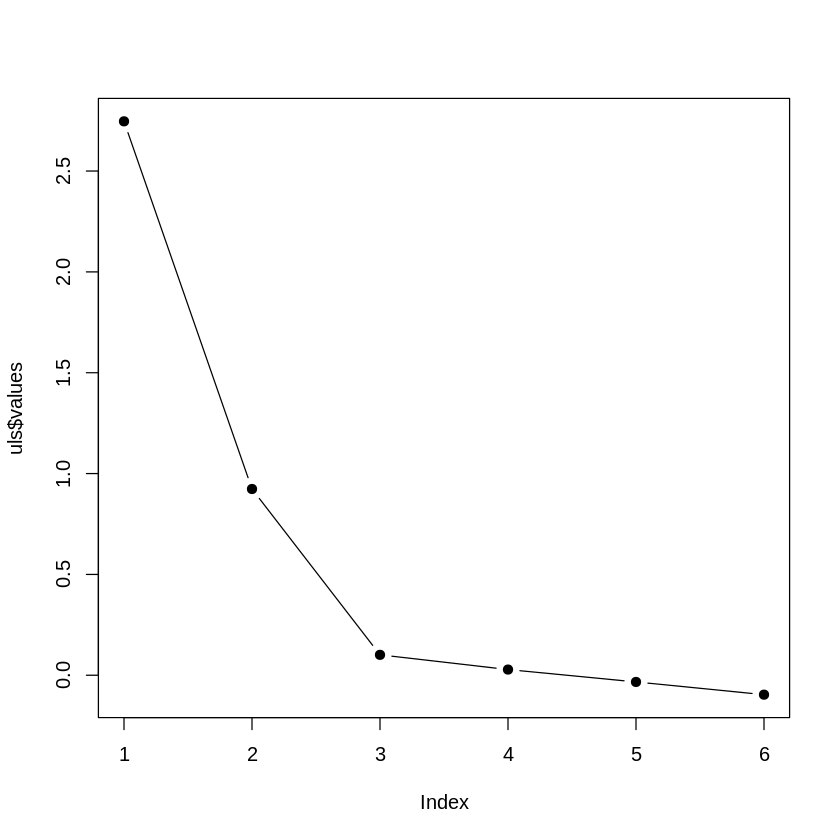

In [36]:
# 인자분석 결과 : 스크리 그림
plot(uls$values, type = 'b', pch = 19)

* 첫번째 인자만 1 이상인 값이지만 세번째 인자부터 기울기가 급격하게 완만해지므로 두번째 고유근도 유효한 인자로 보도록 하였다

In [38]:
#인자분석 결과 : 인자부하값 & 공통성
uls

Factor Analysis using method =  minres
Call: fa(r = fem, nfactors = 2, rotate = "none", fm = "minres")
Standardized loadings (pattern matrix) based upon correlation matrix
          MR1   MR2   h2   u2 com
visperc  0.55  0.42 0.49 0.51 1.9
cubes    0.45  0.56 0.51 0.49 1.9
lozenges 0.59  0.40 0.50 0.50 1.8
paragrap 0.82 -0.31 0.76 0.24 1.3
sentence 0.78 -0.27 0.69 0.31 1.2
wordmean 0.78 -0.33 0.71 0.29 1.3

                       MR1  MR2
SS loadings           2.75 0.92
Proportion Var        0.46 0.15
Cumulative Var        0.46 0.61
Proportion Explained  0.75 0.25
Cumulative Proportion 0.75 1.00

Mean item complexity =  1.6
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  15  and the objective function was  2.61 with Chi Square of  180.33
The degrees of freedom for the model are 4  and the objective function was  0.08 

The root mean square of the residuals (RMSR) is  0.03 
The df corrected root mean square of the residuals is  0.05 

* 공통성(com) : 전체 변수가 0.4보다 큼 -> 추출된 요인이 변수들의 속성을 잘 반영한다
* 설명력 : 첫번째 인자 = 45%, 두번째 인자 = 16%
* 첫번째 인자의 변수 부하값 : paragraph, sentense, wordmean가 큰값을 가짐
* 두번째 인자의 변수 부하값 : visperc, cubes, lozenges가 큰값을 가짐
* 첫번째 인자 -> 언어력, 두번째 인자 -> 공간지각능력으로 인자를 특정할 수 있음

> 각 변수에 대한 인자모형
* visperc = 0.47 factor1 + 0.52 factor2 + e1
* cubes = 0.35 factor1 + 0.62 factor2 + e2
* ...

In [39]:
#인자 점수
uls$scores

MR1,MR2
-0.5470248,0.531011880
0.2544819,0.169674923
2.3831236,0.419931438
-0.4626434,0.056638921
-0.2315922,0.132244497
-0.4943102,-0.586184336
-1.7580111,-0.195193663
0.8070531,1.130445963
-0.2534960,0.203701916
1.3735156,-0.055053503


> 인자 점수 함수식
* factor1 = 0.47 visperc + 0.35 cubes + ... + 0.83 wordmean
* factor2 = 0.52 visperc + 0.62 cubes + ... - 0.18 wordmean
* ...

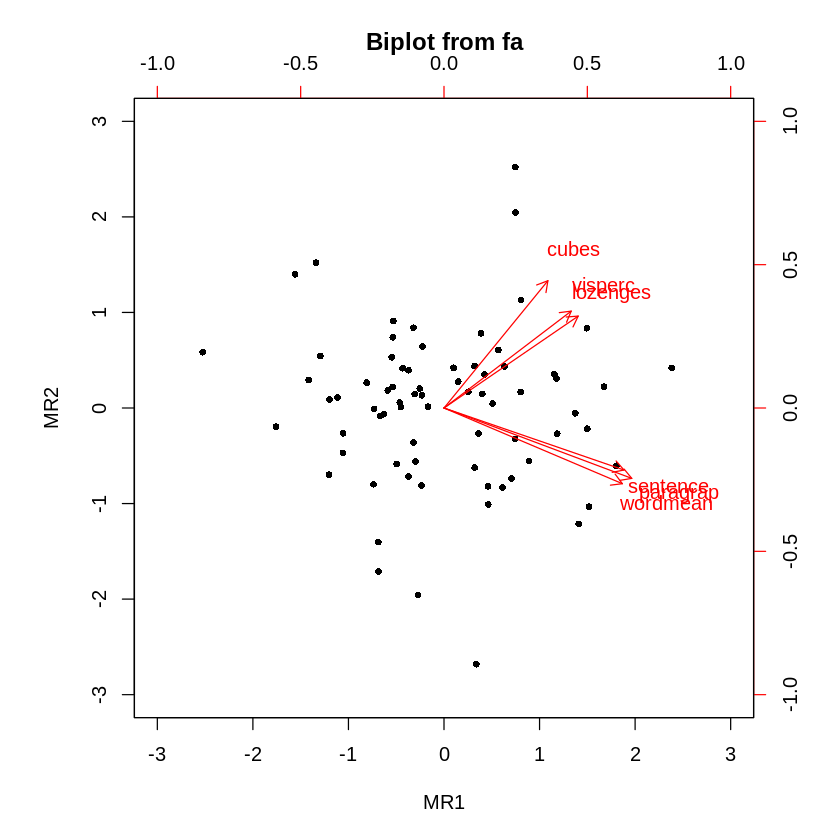

In [40]:
#행렬도
biplot(uls, cex = 0.7)

* 각 인자와 관련된 변수들이 비슷한 위치 및 방향을 가지고 분포하는 것을 알 수 있음